In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
plt.rc('font', family = 'AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지

In [47]:
asos_df = pd.read_csv('/Volumes/ESD-ISO/project_preson/LSTM/LSTM_data/ASOS_data_preprocessed_V2.csv', index_col=0)

In [29]:
asos_df

,tm,hm,pv,ps,td,pa,dc10Tca,clfmAbbrCd,lcsCh,m005Te,m01Te,m02Te,m03Te,vs,ws,wd,rn,rainy_day
0,1980-01-05 03:00,57.0,1.9,1027.9,-15.1,1016.4,0.0,no_cloud,0.0,-3.6,0.6,1.3,1.3,3000.0,2.0,250.0,0.0,0
1,1980-01-05 09:00,49.0,1.6,1028.2,-17.1,1016.7,0.0,no_cloud,0.0,-5.2,-0.5,0.9,1.1,1500.0,1.2,290.0,0.0,0
2,1980-01-05 15:00,41.0,2.2,1025.0,-13.3,1013.8,0.0,no_cloud,0.0,-0.1,0.2,1.0,1.0,2000.0,3.0,230.0,0.0,0
3,1980-01-05 21:00,64.0,3.1,1022.9,-9.0,1011.7,10.0,ScNs,0.0,-0.6,-0.3,1.0,1.0,2000.0,0.7,90.0,0.0,0
4,1980-01-06 03:00,92.0,4.3,1021.3,-4.7,1010.2,10.0,As,0.0,-0.7,0.3,0.9,0.8,2000.0,1.0,20.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43648,2024-12-30 21:00:00,67.0,6.1,1016.0,0.0,1005.4,6.0,Ci,2.0,-0.1,-0.3,0.8,1.7,1053.0,2.7,270.0,0.0,0
43649,2024-12-30 22:00:00,71.0,6.1,1016.2,0.0,1005.6,0.0,no_clouds,0.0,-0.1,-0.3,0.8,1.7,906.0,2.4,270.0,0.0,0
43650,2024-12-30 23:00:00,75.0,6.1,1016.0,0.0,1005.4,0.0,no_clouds,0.0,-0.1,-0.3,0.8,1.7,754.0,0.7,250.0,0.0,0
43651,2024-12-31 00:00:00,81.0,7.0,1015.8,1.8,1005.2,9.0,no_clouds,0.0,-0.1,-0.3,0.8,1.7,563.0,2.3,250.0,0.0,0


In [30]:
# 운형 라벨인코딩
encoder = LabelEncoder()
asos_df.clfmAbbrCd = encoder.fit_transform(asos_df.clfmAbbrCd)

# datetime형으로 시간 변환
asos_df['tm'] = pd.to_datetime(asos_df['tm'])

# corr을 위한 datetime을 초단위 int형으로 변환
asos_df['tm'] = asos_df['tm'].astype('int64') // 10**9

In [46]:
asos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60794 entries, 0 to 43652
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tm          60794 non-null  datetime64[ns]
 1   hm          60794 non-null  float64       
 2   pv          60794 non-null  float64       
 3   ps          60790 non-null  float64       
 4   td          60794 non-null  float64       
 5   pa          60794 non-null  float64       
 6   dc10Tca     60774 non-null  float64       
 7   clfmAbbrCd  60794 non-null  int64         
 8   lcsCh       60794 non-null  float64       
 9   m005Te      60794 non-null  float64       
 10  m01Te       60794 non-null  float64       
 11  m02Te       60794 non-null  float64       
 12  m03Te       60794 non-null  float64       
 13  vs          60794 non-null  float64       
 14  ws          60793 non-null  float64       
 15  wd          60794 non-null  float64       
 16  rn          60794 non-

In [32]:
asos_df.corr()

,tm,hm,pv,ps,td,pa,dc10Tca,clfmAbbrCd,lcsCh,m005Te,m01Te,m02Te,m03Te,vs,ws,wd,rn,rainy_day
tm,1.000000,-0.017710,0.083613,-0.033877,0.078575,-0.019446,-0.027476,0.096037,-0.011200,0.092203,0.080022,0.077289,0.092018,0.381531,-0.054757,0.000285,-0.007690,-0.039639
hm,-0.017710,1.000000,0.510556,-0.364929,0.538134,-0.370434,0.389066,0.071435,0.000309,0.203909,0.251671,0.290008,0.311559,-0.397847,-0.240412,-0.233519,0.202732,0.373020
pv,0.083613,0.510556,1.000000,-0.770817,0.949840,-0.755286,0.372331,-0.100588,0.133441,0.872108,0.888859,0.889943,0.890075,-0.079247,-0.082268,-0.140467,0.141210,0.216947
ps,-0.033877,-0.364929,-0.770817,1.000000,-0.793756,0.999300,-0.383942,0.091182,-0.128538,-0.771398,-0.775603,-0.766152,-0.752438,0.104085,-0.093170,0.045258,-0.145839,-0.239686
td,0.078575,0.538134,0.949840,-0.793756,1.000000,-0.776052,0.397036,-0.131728,0.162569,0.900997,0.913649,0.913293,0.910160,-0.111317,-0.102750,-0.185966,0.125079,0.204446
pa,-0.019446,-0.370434,-0.755286,0.999300,-0.776052,1.000000,-0.383866,0.086020,-0.123521,-0.750630,-0.755638,-0.746835,-0.733176,0.113531,-0.098041,0.040877,-0.148221,-0.244836
dc10Tca,-0.027476,0.389066,0.372331,-0.383942,0.397036,-0.383866,1.000000,-0.378379,0.394061,0.261530,0.258947,0.253096,0.251400,-0.211142,0.030093,-0.191577,0.162981,0.325956
clfmAbbrCd,0.096037,0.071435,-0.100588,0.091182,-0.131728,0.086020,-0.378379,1.000000,-0.722741,-0.151002,-0.140361,-0.130352,-0.124913,-0.008604,0.021010,0.106591,0.052740,0.126300
lcsCh,-0.011200,0.000309,0.133441,-0.128538,0.162569,-0.123521,0.394061,-0.722741,1.000000,0.158325,0.153426,0.148959,0.148795,0.021016,-0.013731,-0.145050,-0.039454,-0.059932
m005Te,0.092203,0.203909,0.872108,-0.771398,0.900997,-0.750630,0.261530,-0.151002,0.158325,1.000000,0.991966,0.976659,0.964622,0.058069,0.012630,-0.080746,0.069153,0.099368


In [33]:
hm_rainy_day_mean = asos_df.groupby('rainy_day')['hm'].mean()
pv_rainy_day_mean = asos_df.groupby('rainy_day')['pv'].mean()
dc10Tca_rainy_day_mean = asos_df.groupby('rainy_day')['dc10Tca'].mean()
m03Te_rainy_day_mean = asos_df.groupby('rainy_day')['m03Te'].mean()
Te_rainy_day_mean = asos_df.groupby('rainy_day')[['m005Te', 'm01Te', 'm02Te', 'm03Te']].mean()
pa_rainy_day_mean = asos_df.groupby('rainy_day')['pa'].mean()
ps_rainy_day_mean = asos_df.groupby('rainy_day')['ps'].mean()

In [34]:
# hm 습도
# pv 증기압
# td 이슬점온도
# pa 현지기압
# ps 해면기압
# dc10Tca 전운량
# clfmAbbrCd 운형
# lcsCh 최저운고
# m005Te 5cm 지중온도
# m01Te 10cm 지중온도
# m02Te	20cm 지중온도
# m03Te	30cm 지중온도
# vs	시정
# ws	풍속
# wd	풍향
# rn	강수량
# tm 시간

[Text(1, 0, '습도')]

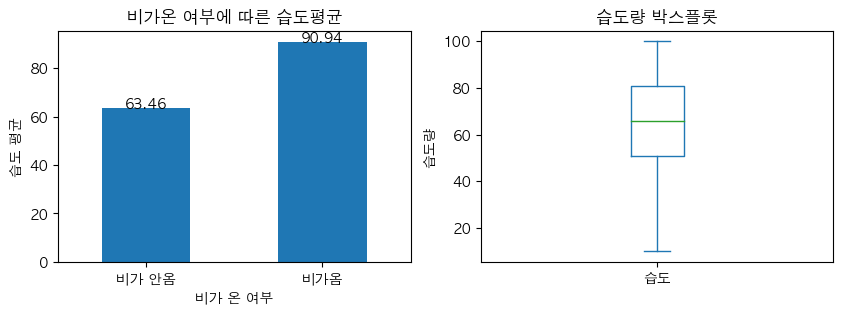

In [35]:
fig, axes = plt.subplots(ncols=2, figsize = (10,3))
hm_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('습도 평균')
axes[0].set_title('비가온 여부에 따른 습도평균')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)
for idx, value in enumerate(hm_rainy_day_mean):
    axes[0].text(idx, value + 4.5, '{:.2f}'.format(value), ha='center', va='top', fontsize=10)
asos_df['hm'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('습도량')
axes[1].set_title('습도량 박스플롯')
axes[1].set_xticklabels(['습도'], rotation=0)

[Text(1, 0, '증기압')]

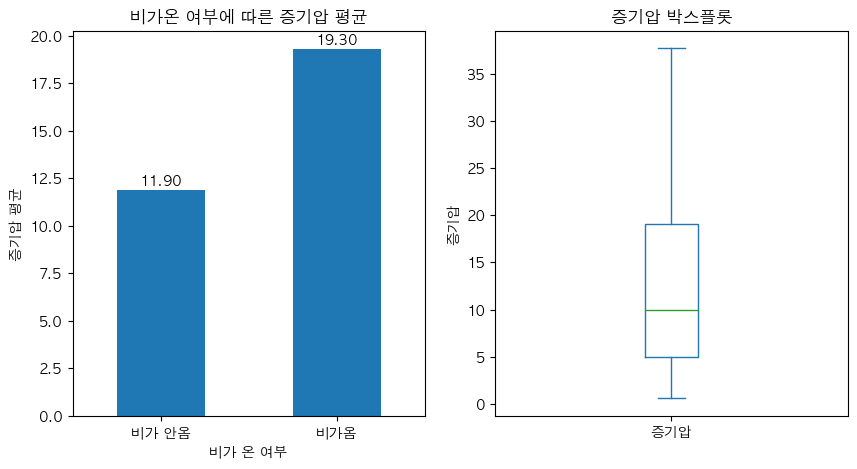

In [36]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5))
pv_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('증기압 평균')
axes[0].set_title('비가온 여부에 따른 증기압 평균')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)
for idx, value in enumerate(pv_rainy_day_mean):
    axes[0].text(idx, value + 0.8, '{:.2f}'.format(value), ha='center', va='top', fontsize=10)
asos_df['pv'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('증기압')
axes[1].set_title('증기압 박스플롯')
axes[1].set_xticklabels(['증기압'], rotation=0)

[Text(1, 0, '전운량')]

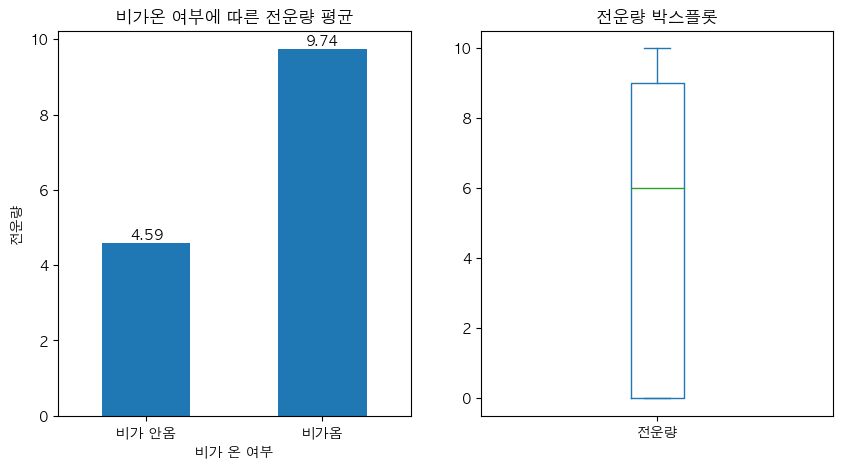

In [37]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5))
dc10Tca_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('전운량')
axes[0].set_title('비가온 여부에 따른 전운량 평균')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)
for idx, value in enumerate(dc10Tca_rainy_day_mean):
    axes[0].text(idx, value + 0.4, '{:.2f}'.format(value), ha='center', va='top', fontsize=10)
asos_df['dc10Tca'].plot(kind='box', ax=axes[1])
axes[1].set_title('전운량 박스플롯')
axes[1].set_xticklabels(['전운량'], rotation=0)

[Text(1, 0, '30cm 지중온도')]

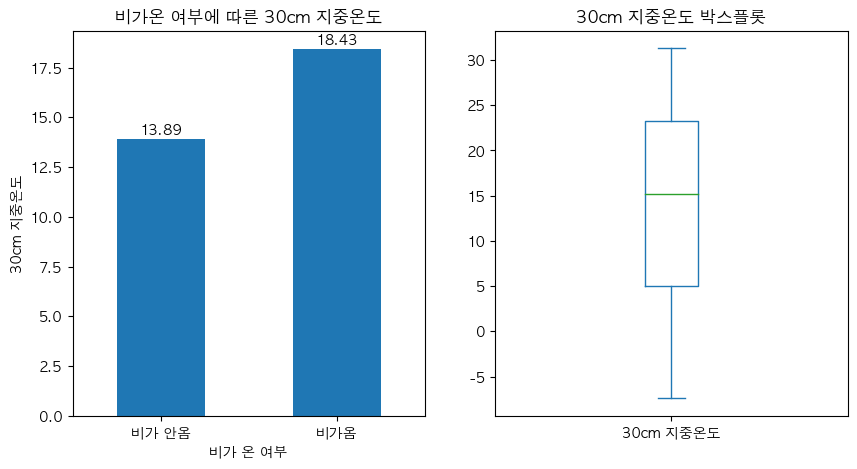

In [38]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5))
m03Te_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('30cm 지중온도')
axes[0].set_title('비가온 여부에 따른 30cm 지중온도')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)
for idx, value in enumerate(m03Te_rainy_day_mean):
    axes[0].text(idx, value + 0.8, '{:.2f}'.format(value), ha='center', va='top', fontsize=10)
asos_df['m03Te'].plot(kind='box', ax=axes[1])
axes[1].set_title('30cm 지중온도 박스플롯')
axes[1].set_xticklabels(['30cm 지중온도'], rotation=0)

In [39]:
Te_rainy_day_mean

,m005Te,m01Te,m02Te,m03Te
rainy_day,,,,
0,13.903204,13.752095,13.691491,13.892621
1,18.016450,18.157679,18.204554,18.430379


Text(0.5, 1.0, '지중온도별 박스플롯')

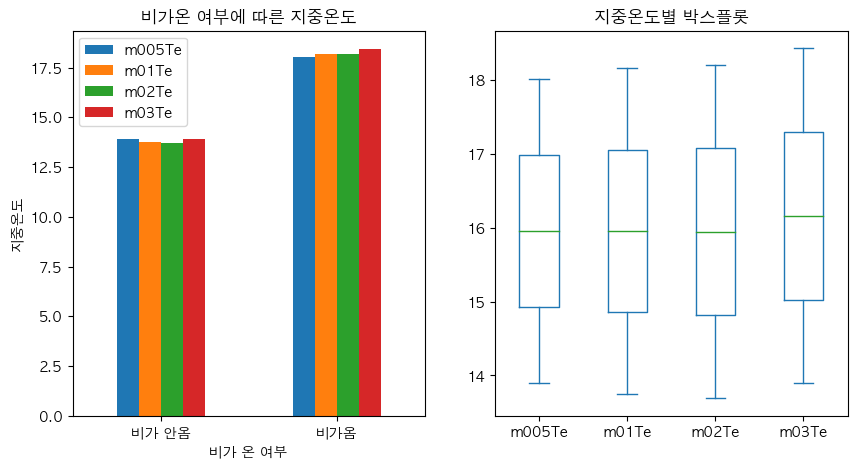

In [40]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5))
Te_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('지중온도')
axes[0].set_title('비가온 여부에 따른 지중온도')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)

Te_rainy_day_mean.plot(kind='box', ax=axes[1])
axes[1].set_title('지중온도별 박스플롯')

In [41]:
# 위에 비가왔을때 지중온도가 높은 이유를 추측해 보자면 우리나라 기후에선 여름에 비가 많이오기에 이미 지면이 달궈진 상태일것이다 
# 그럼으로 비가 안온날은 평균온도가 겨울같이 지면이 차가운 경우가 더 많고 비가 온날은 지면이 달궈진 여름의 데이터가 많을 확률이 높다

In [53]:
# 위의 가설을 확인하기 위해 계절별로 데이터 추출후 다시 서브플롯
# 'tm' 컬럼을 datetime 형식으로 변환
asos_df['tm'] = asos_df['tm'].map(lambda x : x+':00' if len(x) != 19 else x) # tm컬럼의 시간이 년도별로 시간:분 or 시간:분:초로 되어있어서 변환
asos_df['tm'] = pd.to_datetime(asos_df['tm'])

# 계절별 데이터 필터링 함수 정의
def extract_season_data(data, season):
    if season == 'spring':
        return data[(data['tm'].dt.month >= 3) & (data['tm'].dt.month <= 5)]
    elif season == 'summer':
        return data[(data['tm'].dt.month >= 6) & (data['tm'].dt.month <= 8)]
    elif season == 'fall':
        return data[(data['tm'].dt.month >= 9) & (data['tm'].dt.month <= 11)]
    elif season == 'winter':
        return data[(data['tm'].dt.month == 12) | (data['tm'].dt.month <= 2)]
    else:
        return None

# 계절별 데이터 추출
spring_data = extract_season_data(asos_df, 'spring')
summer_data = extract_season_data(asos_df, 'summer')
fall_data = extract_season_data(asos_df, 'fall')
winter_data = extract_season_data(asos_df, 'winter')

# print(spring_data.head())
# print(summer_data.head())
# print(fall_data.head())
# print(winter_data.head())

In [43]:
te_summer_mean = summer_data.groupby(['rainy_day'])[['m005Te', 'm01Te', 'm02Te', 'm03Te']].mean()
te_winter_mean = winter_data.groupby(['rainy_day'])[['m005Te', 'm01Te', 'm02Te', 'm03Te']].mean()

In [62]:
te_summer_mean

,m005Te,m01Te,m02Te,m03Te
rainy_day,,,,
0,26.51649,26.255599,25.581829,25.215167
1,24.54685,24.762705,24.745262,24.879910


Text(0.5, 1.0, '지중온도별 여름 박스플롯')

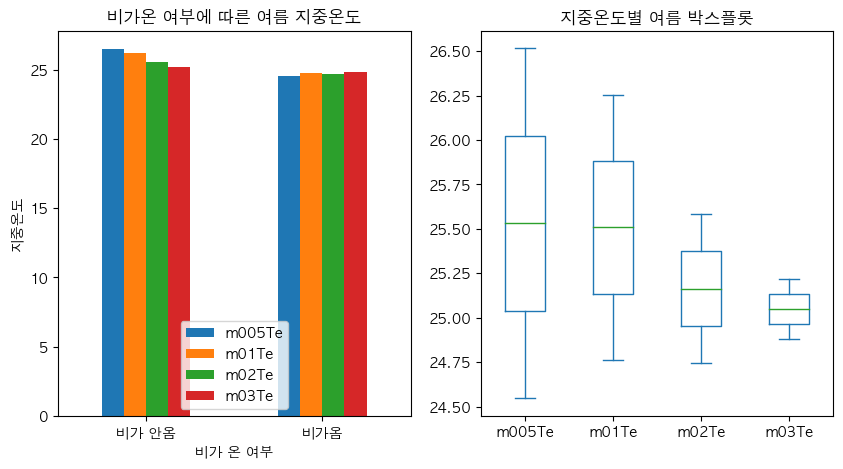

In [63]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5)) # 여름의 경우 비가 왔을경우 지중온도가 낮은것을 확인
te_summer_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('지중온도')
axes[0].set_title('비가온 여부에 따른 여름 지중온도')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)

te_summer_mean.plot(kind='box', ax=axes[1])
axes[1].set_title('지중온도별 여름 박스플롯')

Text(0.5, 1.0, '지중온도별 박스플롯')

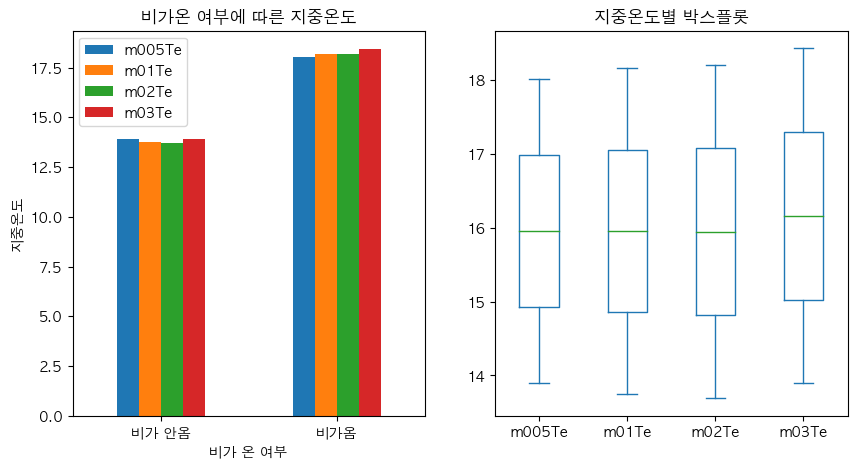

In [56]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5)) # 겨울의 경우 비가 왔을때 지중온도가 더 높은것을 확인(아마 비가 아닌 눈으로 내려 지면층을 덮어주기때문으로 생각됨)
te_winter_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('지중온도')
axes[0].set_title('비가온 여부에 따른 지중온도')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)

te_winter_mean.plot(kind='box', ax=axes[1])
axes[1].set_title('지중온도별 박스플롯')

[Text(1, 0, '기압')]

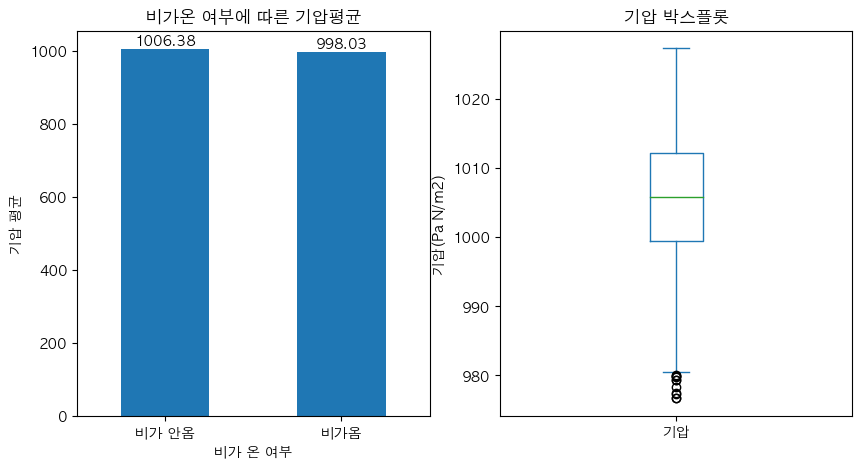

In [27]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5)) # 수치가 비가 온날과 비가 안온날의 수치가 너무 낮음
pa_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('기압 평균')
axes[0].set_title('비가온 여부에 따른 기압평균')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)
for idx, value in enumerate(pa_rainy_day_mean):
    axes[0].text(idx, value + 40, '{:.2f}'.format(value), ha='center', va='top', fontsize=10)
asos_df['pa'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('기압(Pa N/m2)')
axes[1].set_title('기압 박스플롯')
axes[1].set_xticklabels(['기압'], rotation=0)

[Text(1, 0, '기압')]

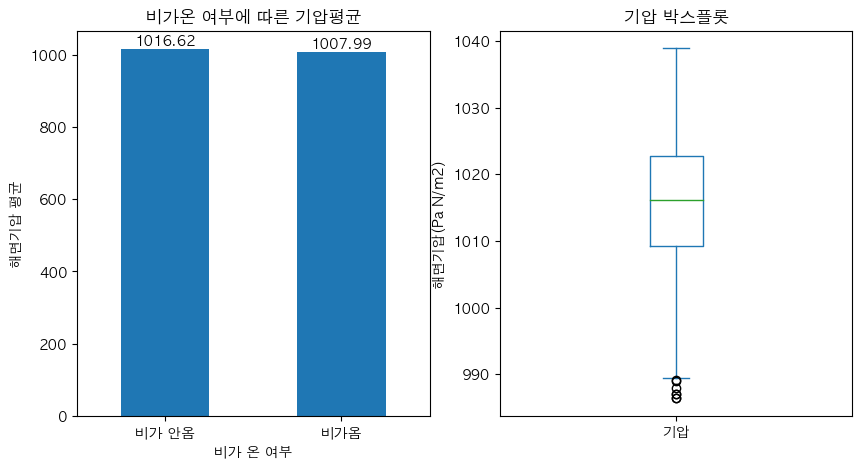

In [29]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5)) # 수치가 비가 온날과 비가 안온날의 수치가 너무 낮음
ps_rainy_day_mean.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('비가 온 여부')
axes[0].set_ylabel('해면기압 평균')
axes[0].set_title('비가온 여부에 따른 기압평균')
axes[0].set_xticklabels(['비가 안옴', '비가옴'], rotation=0)
for idx, value in enumerate(ps_rainy_day_mean):
    axes[0].text(idx, value + 40, '{:.2f}'.format(value), ha='center', va='top', fontsize=10)
asos_df['ps'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('해면기압(Pa N/m2)')
axes[1].set_title('기압 박스플롯')
axes[1].set_xticklabels(['기압'], rotation=0)

In [ ]:
# hm 습도
# pv 증기압
# td 이슬점온도
# pa 현지기압
# ps 해면기압
# dc10Tca 전운량
# clfmAbbrCd 운형
# lcsCh 최저운고
# m005Te 5cm 지중온도
# m01Te 10cm 지중온도
# m02Te	20cm 지중온도
# m03Te	30cm 지중온도
# vs	시정
# ws	풍속
# wd	풍향
# rn	강수량
# tm 시간

/var/folders/kk/gw33n2fd53b2m5g5p87946br0000gn/T/ipykernel_12129/3091222300.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  six_month_data = asos_df.set_index('tm').resample('6M').mean()


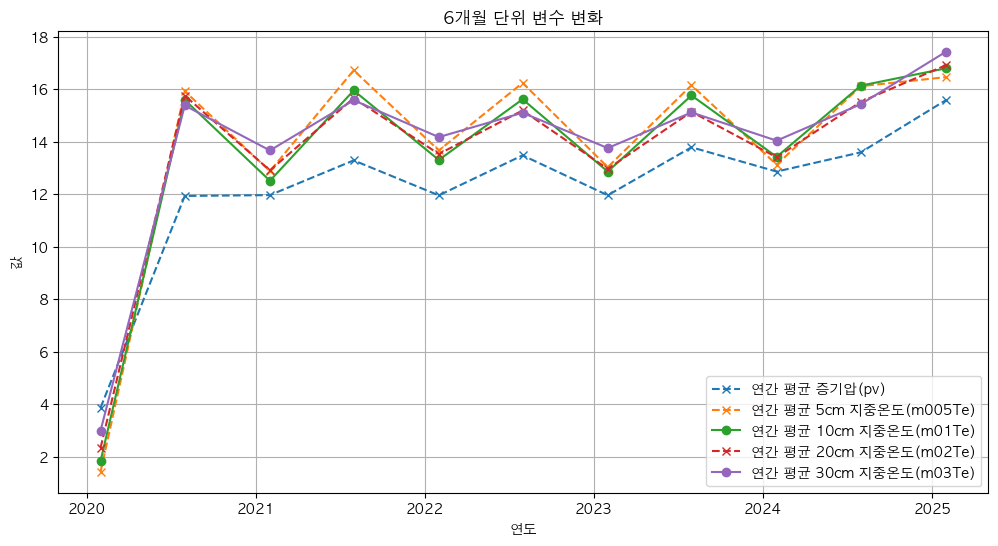

In [48]:
six_month_data = asos_df.set_index('tm').resample('6M').mean()

plt.figure(figsize=(12, 6))
#plt.plot(six_month_data.index, six_month_data['hm'], label='연간 평균 습도(hm)', marker='o', linestyle='-')
plt.plot(six_month_data.index, six_month_data['pv'], label='연간 평균 증기압(pv)', marker='x', linestyle='--')
#plt.plot(six_month_data.index, six_month_data['dc10Tca'], label='연간 평균 전운량(dc10Tca)', marker='o', linestyle='-')
plt.plot(six_month_data.index, six_month_data['m005Te'], label='연간 평균 5cm 지중온도(m005Te)', marker='x', linestyle='--')
plt.plot(six_month_data.index, six_month_data['m01Te'], label='연간 평균 10cm 지중온도(m01Te)', marker='o', linestyle='-')
plt.plot(six_month_data.index, six_month_data['m02Te'], label='연간 평균 20cm 지중온도(m02Te)', marker='x', linestyle='--')
plt.plot(six_month_data.index, six_month_data['m03Te'], label='연간 평균 30cm 지중온도(m03Te)', marker='o', linestyle='-')
#plt.plot(six_month_data.index, six_month_data['pa'], label='연간 평균 기압(pa)', marker='x', linestyle='--')

plt.title("6개월 단위 변수 변화")
plt.xlabel("연도")
plt.ylabel("값")
plt.legend()
plt.grid(True)

plt.show()
# 위 주석처리한 데이터는 범위가 너무 달라 그래프가 보이지 않음